# Reinforcement Learning

# Multi Armed Bandits using Epsilon-greedy

# Comparing different epsilons

In probability theory, the multi-armed bandit problem is a problem in which a fixed limited set of resources must be allocated between competing (alternative) choices in a way that maximizes their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better understood as time passes or by allocating resources to the choice. The name comes from imagining a gambler at a row of slot machines (sometimes known as "one-armed bandits"), who has to decide which machines to play, how many times to play each machine and in which order to play them, and whether to continue with the current machine or try a different machine. The multi-armed bandit problem also falls into the broad category of Stochastic scheduling.


This solution implements the epsilon-greedy strategy, where the machines and explored with a probability epsilon and exploited with a probability (1 - epsilon). In this notebook, four different epsilons are tested and their results are later on shown together.

In [50]:
# imports
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Bandit class
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [52]:
# run all experiments
def run_experiment(list_machine_rewards, eps, N):
    bandits = [Bandit(i) for i in list_machine_rewards]

    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    for machine_reward in list_machine_rewards:
        plt.plot(np.ones(N)*machine_reward)
    plt.xscale('log')
    plt.title ('Cumulative average reward over epochs for epsilon {} - log scale'.format(eps))
    plt.xlabel('Epochs')
    plt.ylabel('Cumulative average reward')
    plt.show()

    for b in bandits:
        print('Estimated reward of bandit with true reward {}: {}'.format(b.m, round(b.mean, 3)))

    return cumulative_average

In [53]:
# parameters initialization
# expected reward
machine1_reward = 1.0
machine2_reward = 2.0
machine3_reward = 3.0
machine4_reward = 4.0

list_machine_rewards = [machine1_reward, machine2_reward, machine3_reward, machine4_reward]


# epsilon (probability of exploring)
epsilon1 = 0.3
epsilon2 = 0.1
epsilon3 = 0.05
epsilon4 = 0.01

# number of epochs
epochs = 100000

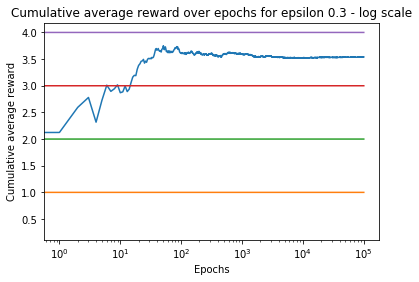

Estimated reward of bandit with true reward 1.0: 0.997
Estimated reward of bandit with true reward 2.0: 2.008
Estimated reward of bandit with true reward 3.0: 2.979
Estimated reward of bandit with true reward 4.0: 3.998


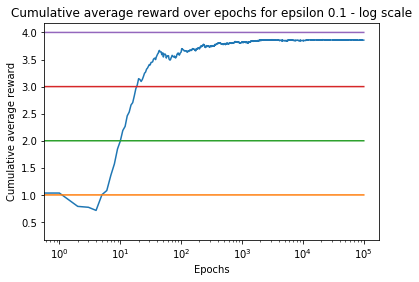

Estimated reward of bandit with true reward 1.0: 1.034
Estimated reward of bandit with true reward 2.0: 1.984
Estimated reward of bandit with true reward 3.0: 3.018
Estimated reward of bandit with true reward 4.0: 4.007


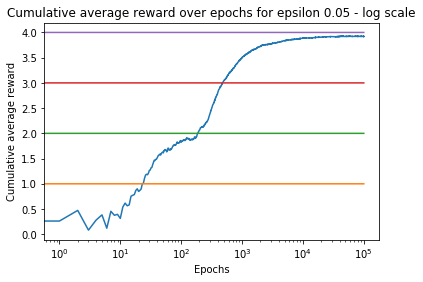

Estimated reward of bandit with true reward 1.0: 1.017
Estimated reward of bandit with true reward 2.0: 1.992
Estimated reward of bandit with true reward 3.0: 3.028
Estimated reward of bandit with true reward 4.0: 4.001


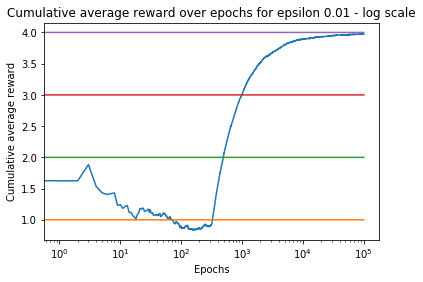

Estimated reward of bandit with true reward 1.0: 0.944
Estimated reward of bandit with true reward 2.0: 2.001
Estimated reward of bandit with true reward 3.0: 2.977
Estimated reward of bandit with true reward 4.0: 3.998


In [55]:
# main

c_3 = run_experiment(list_machine_rewards, epsilon1, epochs)
c_1 = run_experiment(list_machine_rewards, epsilon2, epochs)
c_05 = run_experiment(list_machine_rewards, epsilon3, epochs)
c_01 = run_experiment(list_machine_rewards, epsilon4, epochs)

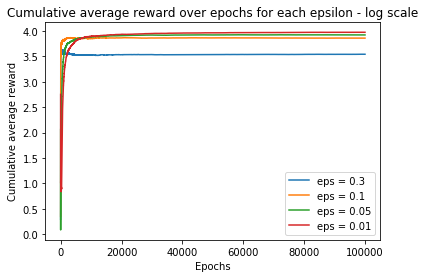

In [57]:
# linear plot
plt.title('linear plot')
plt.plot(c_3, label='eps = 0.3')
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.title ('Cumulative average reward over epochs for each epsilon - log scale')
plt.xlabel('Epochs')
plt.ylabel('Cumulative average reward')
plt.legend()
plt.show()

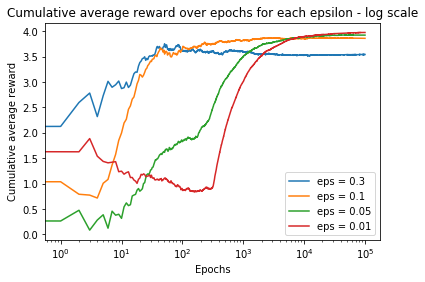

In [58]:
# log scale plot
plt.title('log plot')
plt.plot(c_3, label='eps = 0.3')
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.xscale('log')
plt.title ('Cumulative average reward over epochs for each epsilon - log scale')
plt.xlabel('Epochs')
plt.ylabel('Cumulative average reward')
plt.legend()
plt.show()